# Fixed-Flat Appliance

In [1]:
# importing functions
from ramp import User, UseCase, get_day_type
import pandas as pd

### Creating a user

In [17]:
school = User(user_name="School", num_users=1)

### Adding an appliance with flat and fixed consumption

In [18]:
indoor_bulb = school.add_appliance(
    name="Indoor Light Bulb",
    number=10,
    power=25,
    num_windows=1,
    func_time=210,
    time_fraction_random_variability=0.2,
    func_cycle=60,
    fixed="yes",
    flat="yes",
)
indoor_bulb.windows(
    window_1=[1200, 1440],  # from 20:00 to 24:00
    window_2=[0, 0],
    random_var_w=0.35,
)

### Initialize the usecase (it defines the peak time range and simulation time)

In [19]:
school_case = UseCase(users=[school], date_start="2023-01-01")
school_case.initialize(num_days=7)

You will simulate 7 days from 2023-01-01 until 2023-01-07 00:00:00


### Generating a profile for the 1st week of the year

From the usecase directly

In [ ]:
first_week = school_case.generate_daily_load_profiles(flat=True)

or from the user

In [21]:
first_week = []

for day_idx, day in enumerate(school_case.days):
    first_week.extend(
        school.generate_single_load_profile(
            prof_i=day_idx,  # the day to generate the profile
            peak_time_range=school_case.peak_time_range,
            day_type=get_day_type(day),
        )
    )

<AxesSubplot:>

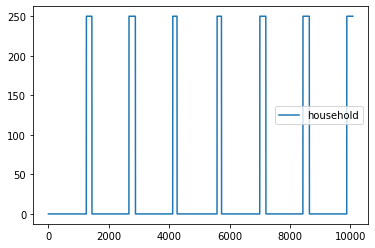

In [13]:
first_week = pd.DataFrame(first_week, columns=["household"])
first_week.plot()